<a href="https://colab.research.google.com/github/plopezmp/AmI/blob/main/AmI_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor:
*   Pablo L Matencio

Las figuras de la sección Overfitting y Underfitting están obtenidas del libro:

* A. Géron. *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems*. O’Reilly Media, 2019.

**Preambulo:**

Esta parte *sólo debe hacerla* si necesita importar datos desde su `Google Drive`, por ejemplo.

Montamos nuestro `Google Drive` y cambiamos al directorio donde tenemos guardado el notebook de Python.


In [17]:
 # Primero montamos nuestro Google Drive
 #
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [18]:
# Segundo cambiamos al directorio de trabajo
# Usted debe adaptar cambiando el path a su directorio particular
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')
%pwd

'/content/drive/My Drive/Colab Notebooks'

In [19]:
!pwd

/content/drive/My Drive/Colab Notebooks


---

1. [Linear Regression](#sec_lr)
 - Generación de datos como ejemplo
 - Optimización *manual* de MSE
 - Algoritmo Gradient Descent
 - Vectorización de Gradient Descent
 - Método Analítico: *Ecuacion Normal*
    - Aplicación
 - Predicción de valores nuevos

2. [Librería `Scikit-learn` o `sklearn`](#sec_sklearn)
 - Polynomial Regression
    * Ejemplo
    * `Sklearn` pipeline
 - Overfitting y Underfitting
    * Regularización

---

In [20]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import seaborn as sns; sns.set()

# Las dos lines sig. son para cargar módulos siempre que se usen
# Sólo para pruebas
# %load_ext autoreload
# %autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a name='sec_lr'></a>
# Linear Regression

Metodología de aprendizaje para estimar el valor real de salida en base a un valor de entrada nuevo.



*   Introducción con un modelo sencillo
*   Función de coste usada: MSE
*   Método de Aprendizaje: *Gradient Descent*



---

Un modelo lineal sencillo lo podemos expresar como:

$$ h_{\theta}(x)= \theta_0 + \theta_1 x $$

donde,

* $h_{\theta}(x)$ representa nuestro modelo.
* $\hat{y}$  es el valor estimado y lo calculamos usando $h_{\theta}(x)$.
* $x$ representa el valor de la *feature*.
* $\theta$ son parámetros y son los valores que queremos ajustar. Al valor $\theta_0$ se le llama *bias*.

Tanto los parámetros $\theta$ como la feature $x$ podemos extenderlo a una cantidad de $n$ features. En este caso los podndríamos de forma vectorial:

\begin{equation*}
   \hat{y} =  h_{\boldsymbol{\theta}}(\mathbf{x}) =\boldsymbol{\theta}\cdot \mathbf{x}
\end{equation*}

## Generación de datos como ejemplo

Vamos a explorar la idea del modelo de regresión lineal, comenzando por generar datos con ruido añadido.

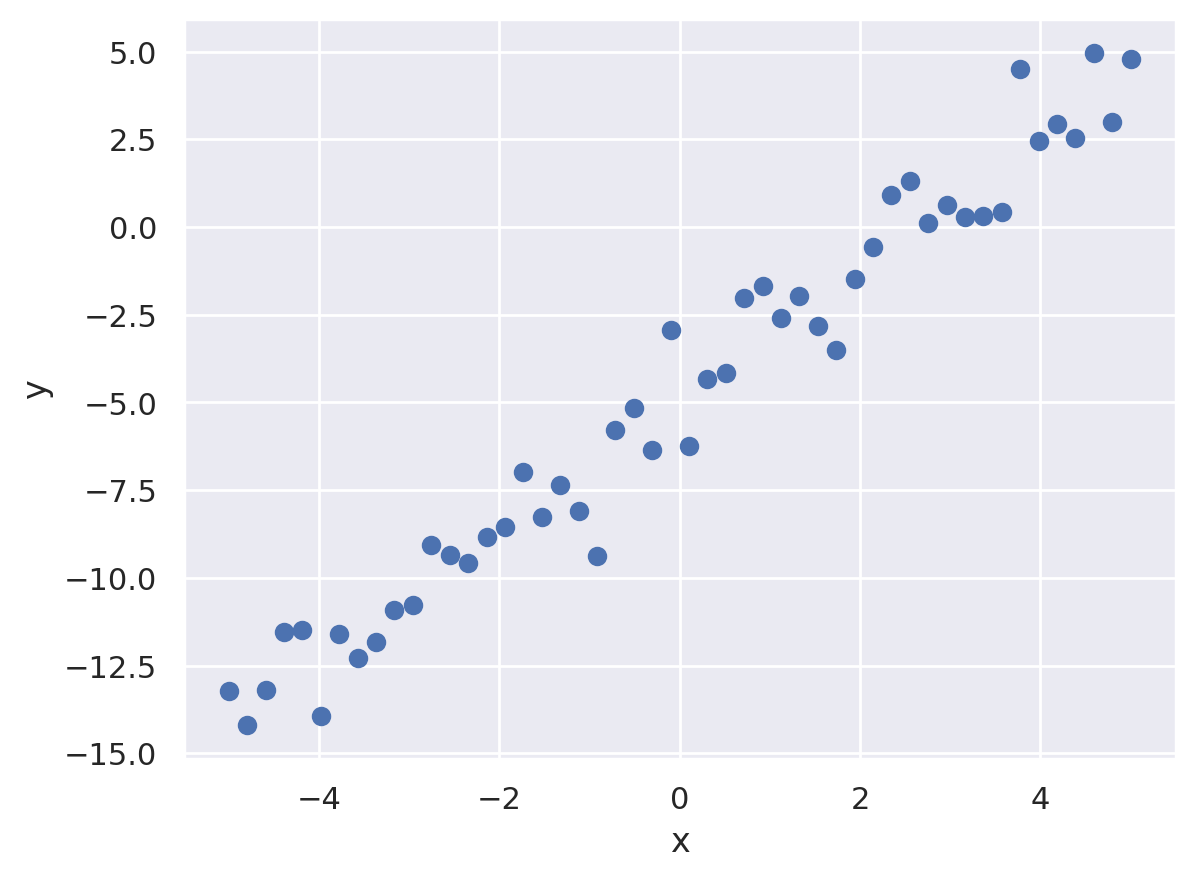

In [21]:
npr.seed(0)

x = np.linspace(-5, 5, 50)
tt1_real = 2
tt0_real = -5

def noise(t):
  return npr.normal(0, 1, size=t)

y = tt1_real * x + tt0_real + noise(len(x))

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');
# en caso de necesitar guradar la figura, usar savefig()
# plt.savefig('miLR.pdf', format='pdf', dpi=1000, bbox_inches='tight')

Nota: Los valores de $x$ están equiespaciados pero podría ser cualquier valor.

Ahora vamos a dar valores a una hipótesis cualquiera y representamos respecto a nuestros valores:

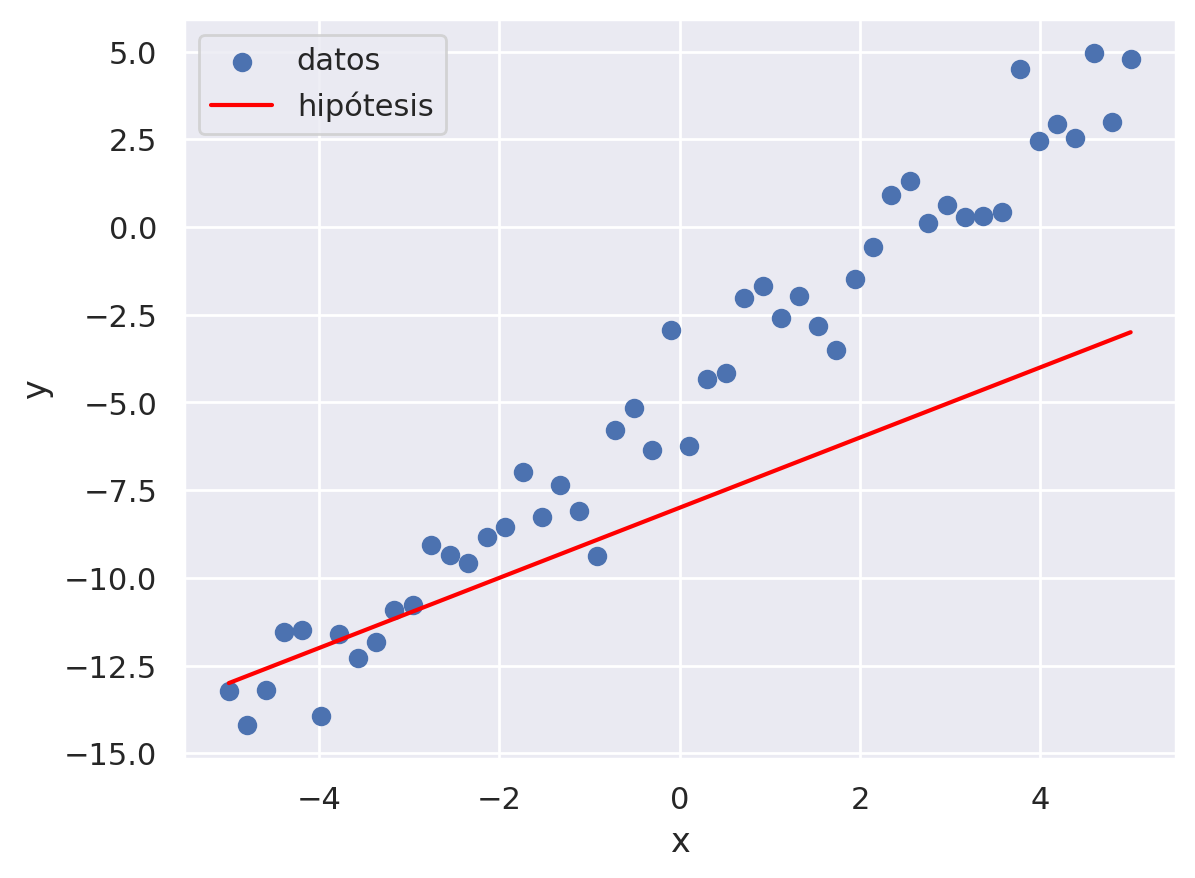

In [22]:
# establecemos una hipótesis cualquiera
tt1 = 1
tt0 = -8
y_est = tt1 * x + tt0

# plot del traning set
plt.scatter(x, y, label='datos')
#plot de la hipótesis
plt.plot(x, y_est, color='red', label='hipótesis')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Lo que debe realizar nuestro modelo de aprendizaje es minimizar el *Mean Square Error*, MSE, y la podemos definir como:

$$\text{MSE} = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$$

Esta función será nuestra función de coste y la representamos por $J(\theta_0, \theta_1)$, o, símplemente, $J(\boldsymbol{\theta})$ con

\begin{align}
    \boldsymbol{\theta} &= \begin{bmatrix}
           \theta_{0} \\
           \theta_{1}
         \end{bmatrix}
\end{align}

es decir, $J(\boldsymbol{\theta}) = \text{MSE}$.
(La terminología de Machine Learning también podemos encontrar que a MSE le llama como *loss* o pérdida).

El valor de $(h_\theta(x^{(i)})-y^{(i)})$ es el **residuo** de cada muestra $i$ del *training set*.

En este ejemplo estamos usando sólo una *feature* y tenemos que ajustar sólo dos valores de $\theta$. En general, la función de coste se puede extender a $n$ features y $n+1$ parámetros (incluyendo $\theta_0$).

Vamos a implementar una función que calcule MSE.

In [23]:
# Ejercicio:
# La función debe tomar como parámetros de entrada
# y (y_real) y la y_est (y_estimada)
# Debe devolver un escalar con el MSE.

def mse(y_real: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
  # Note q esta definición de función es nueva a partir de Python 3.5
  # typing: comprobación de tipos de la fun.
  # REALIZAR función:

  # una forma más compacta:
  return (np.mean(np.power(y_pred - y_real, 2)) / 2 )

mse(y, y_est)

np.float64(8.6773254396789)

## Optimización *manual* de MSE

Ahora añadimos unos sliders a la figura de arriba para tratar de encontrar el mejor ajuste a los datos del trining set:

In [24]:
def opt_plot(tt1, tt0):
    y_est = tt0 + tt1 * x
    plt.scatter(x, y, alpha=0.5, label='datos')
    plt.plot(x, y_est, color='red', label='hipótesis')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend()
    plt.title(f'MSE: {mse(y, y_est):.02f}')
    plt.show()

# Define sliders
tt0_slider = FloatSlider(value=0, min=-10, max=10, step=0.1, description='tt0')
tt1_slider = FloatSlider(value=0, min=-10, max=10, step=0.1, description='tt1')

# Create interactive plot
interact(opt_plot, tt0=tt0_slider, tt1=tt1_slider)

interactive(children=(FloatSlider(value=0.0, description='tt1', max=10.0, min=-10.0), FloatSlider(value=0.0, d…

<function __main__.opt_plot(tt1, tt0)>

Por tanto, nuestro objetivo es encontrar los parámetros $\boldsymbol{\theta}$ que minimicen el valor de nuestra función de coste, y lo podemos expresar como:

$$
  \underset{\boldsymbol{\theta}}{\operatorname{argmin}} J(\boldsymbol{\theta})
$$

Podemos sustituir la función de coste por su expresión general para $n$ features. En este caso la hipótesis $h_{\boldsymbol{\theta}}(x)$ podemos espresarla en forma de vectorial como $h({\bf x}) = \boldsymbol{\theta}^{\sf T}{\bf x}$, donde

\begin{align}
    \boldsymbol{\theta} &= \begin{bmatrix}
           \theta_{0} \\
           \theta_{1} \\
           \vdots \\
           \theta_{n}
         \end{bmatrix} , \,\in {\mathbb{R}}^{n + 1} \,,&  
    {\bf x} = \begin{bmatrix}
           x_{0} \\
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
         \end{bmatrix}  , \,\in {\mathbb{R}}^{n+1}
\end{align}

Por tanto, la función de coste a optimizar queda de la siguiente forma:

$$
  J(\boldsymbol{\theta}) = \frac{1}{2m} \sum_{i=1}^{m} \left(\boldsymbol{\theta}^{\sf T}{\bf x}^{(i)} - y^{(i)} \right)^2
$$

Para resolver este problema de optimización de la función de coste se utiliza el método de **Gradient Descent**.

## Algoritmo de Gradient Descent

La idea tras Gradient Descent es la de ir iterando para ir variando los valores de los parámetros $\boldsymbol{\theta}$ hasta encontrar un que haga que la derivada de la función de coste sea igual a cero, y por tanto será un valor mínimo. El valor del vector $\boldsymbol{\theta}$ en ese mínimo nos resuelve el problema de optimización.

El algoritmo puede converger a un mínimo global o también a uno local.

El algoritmo es el siguiente:

Repeat:

{
\begin{align}
\theta_{j} &\leftarrow \theta_{j} - \alpha\frac{\partial}{\partial \theta_j}J(\boldsymbol{\theta}) \\ & \forall j=0,\ldots,n
\end{align}
  }

donde $\alpha$ es un parámetro que regula la *velocidad de aprendizaje* del algoritmo. Un valor de $\alpha \approx 0$ hará que converja muy lentamente. Un valor relativamente grande de $\alpha$ puede provocar *overshooting* he incluso hacer que el algoritmo diverja.

El valor del gradiente de $J(\boldsymbol{\theta})$ queda:

$$
\frac{\partial}{\partial \theta_j}J(\boldsymbol{\theta})= \frac{1}{m}\sum_{i=1}^{m} \left(\boldsymbol{\theta}^{\sf T}{\bf x}^{(i)} - y^{(i)} \right)x_j^{(i)}
$$

La idea es ir dando pequeños pasos de la función **siempre** en la dirección donde $\theta$ hace que la función de coste tenga un mínimo:

- Si la derivada $\partial/\partial \theta_j > 0$ el valor de $\theta_j$ decrecerá, y,
- Si la derivada $\partial/\partial \theta_j < 0$ el valor de $\theta_j$ aumentará.

conforme nos aproximemos al valor mínimo, la derivada parcial será menor y por tanto el avance será más lento. En el valor mínimo la derivada es = 0 y el valor de $\theta$ ya no cambia de una iteración a otra.
La condición de convergencia la podemos establecer cuando la variación de $J(\boldsymbol{\theta})$ en la iteración es $\epsilon \leq 10^{-3}$, denominado *tolerancia*.

### Ejercicio:

Como ejercicio podemos comprobar su funcionamiento aplicándolo al caso sencillo de una función con un mínimo. Por ejemplo, la siguiente función:

$$
f(w) = -5 + 3w + w^2
$$

El mínimo de función está en $w= -3/2$ y podemos calcularlo usando **Gradient Descent**. (Ponemos $w$ para no confundir con $x$ que es el símbolo usado para las *features*).

In [25]:
# función
def f(w: np.ndarray):
  """
  ejemplo de una función hipótesis h(w)
  """
  return (-5 + 3*w + w**2)

# función derivada de f con respecto a w.
def df(w):
  """
  Derivada de h(x) con respecto a x
  """
  return (2*w + 3)

#--------------------------------------


In [26]:
# Para aplicar el algoritmo escogemos un instante inicial
w = 3.14

alpha = 0.005 # learning rate
# Ahora ajustamos 1000 veces el valor de w, tomando pequeños pasos
# en la dirección del gradiente
lastts = []
for i in range(500):
    lastts.append(w)
    w = w - alpha * df(w) # \alpha = 0.01.

print(w)
print(f(w))

-1.4695129586831965
-7.249070540311749


Una manera de saber si el algoritmo está funcionando correctamente es representar el valor de la función que queremos encontrar el mínimo respecto a las iteraciones.

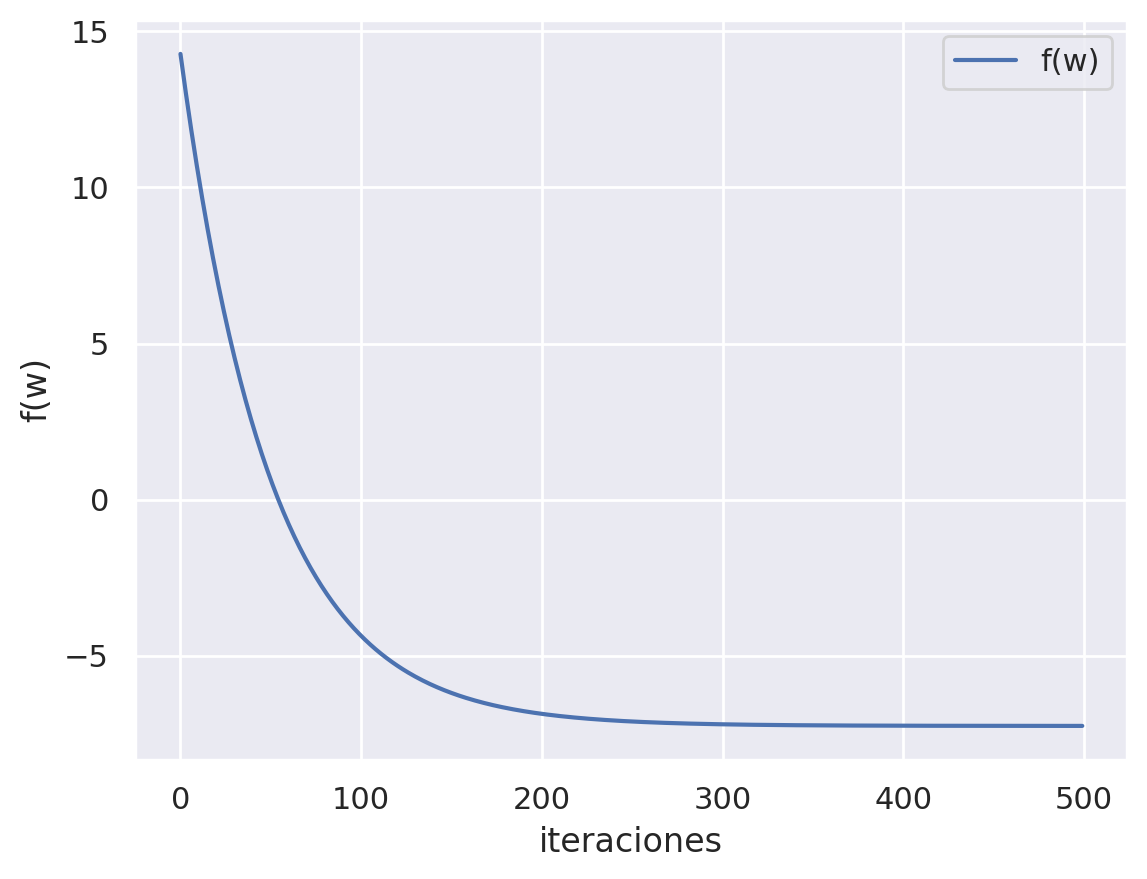

In [27]:
plt.plot([f(t) for t in lastts], label='f(w)')
plt.xlabel('iteraciones')
plt.ylabel('f(w)')
plt.legend();

El valor mínimo de $f$ es $f(w=-3/2)=-7.25$.

De igual modo,  operaríamos para encontrar el valor de $\boldsymbol{\theta}$ que hace mínima nuestra función de coste $J(\boldsymbol{\theta})$.

## Vectorización de Gradient Descent

El ajuste de los valores de los parámetros $\theta_j$ requiere que en cada iteración calculemos la derivada parcial de la función de coste para cada uno de los parámetros.
En lugar de eso, podemos hacer el ajuste de todos los $\theta_j$ de una vez si usamos matrices.

Usamos un vector gradiente, $\nabla_{\boldsymbol{\theta}}J({\boldsymbol{\theta}})$ que contenga todas las derivadas parciales,


\begin{align}
    \nabla_{\boldsymbol{\theta}}J({\boldsymbol{\theta}}) &= \begin{bmatrix}
           \frac{\partial}{\partial \theta_0}J(\boldsymbol{\theta}) \\
           \frac{\partial}{\partial \theta_1}J(\boldsymbol{\theta}) \\
           \vdots \\
           \frac{\partial}{\partial \theta_n}J(\boldsymbol{\theta})
         \end{bmatrix} = \frac{1}{m}{\bf X^{\sf T}}\left( {\bf X}{\boldsymbol{\theta}} - {\bf y} \right)
\end{align}

Loa cómputos sobre la matriz ${\bf X}$ que representa el training set, hace que este algoritmo no escale bien en *training sets* grandes (en ese caso mejor usar la ecuación normal que veremos después). Sin embargo, sí escala bien con el número de *features*.

El algoritmo queda de la siguiente forma:

Repeat:

$$
\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} - \alpha \nabla_{\boldsymbol{\theta}}J({\boldsymbol{\theta}})
$$

<br>

Como el algoritmo requiere calculos con el training set completo en cada iteración, a este algoritmo se le conoce como *Batch Gradient Descent*.
Tiene como desventaja que puede ser lento con training sets grandes. Sin embargo, **escala bien** con el número de *features*.


### Ejercicio:

Implementar Gradient Descent de forma vectorial/matricial.

In [28]:
# Con la finalidad de comparar vamos a usar
# los datos generados al principio del notebook
npr.seed(0)
m = 50 # número de muestras en el training set
x = np.linspace(-5, 5, m)
tt1_real = 2
tt0_real = -5

def noise(t):
  return npr.normal(0, 1, size=t)

y = tt1_real * x + tt0_real + noise(m)
#-----------------------------
# GRADIENT DESCENT
#-----------------------------

X = x[:,np.newaxis]
y = y[:, np.newaxis]
# debemos añadir el feature x_0=1 correspondiente al parámetro bias tt_0
# en cada instancia de X
X_b = np.c_[np.ones((len(x),1)), X]

# Gradient Descent:
# Nota: a la hora de aplicar el método observe el formato de las matrices
# X debe ser (m x n+1)
# y debe ser (m x 1)
# \theta es  (n+1 x 1)
# en nuestro ejemplo n = ?

alpha = 0.1 # learning rate
max_iterations = 500

# inicializamos vector theta con un valor aleatorio
theta = -2 * npr.randn(2,1)
f_cost = []
for iteration in range(max_iterations):
  gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - (alpha * gradients)
  f_cost.append( mse( y, X_b.dot(theta)) )

print('Los valores óptimos de \u03B8 son: ', theta)

Los valores óptimos de θ son:  [[-4.85944073]
 [ 1.85883775]]


Observamos que los valores los los parámetros $\theta$ son parecidos a los que usamos inicialmente para generar los datos reales. El ruido aleatorio que añadimos hace variar los parámetros que consiguen minimizar la función de coste.

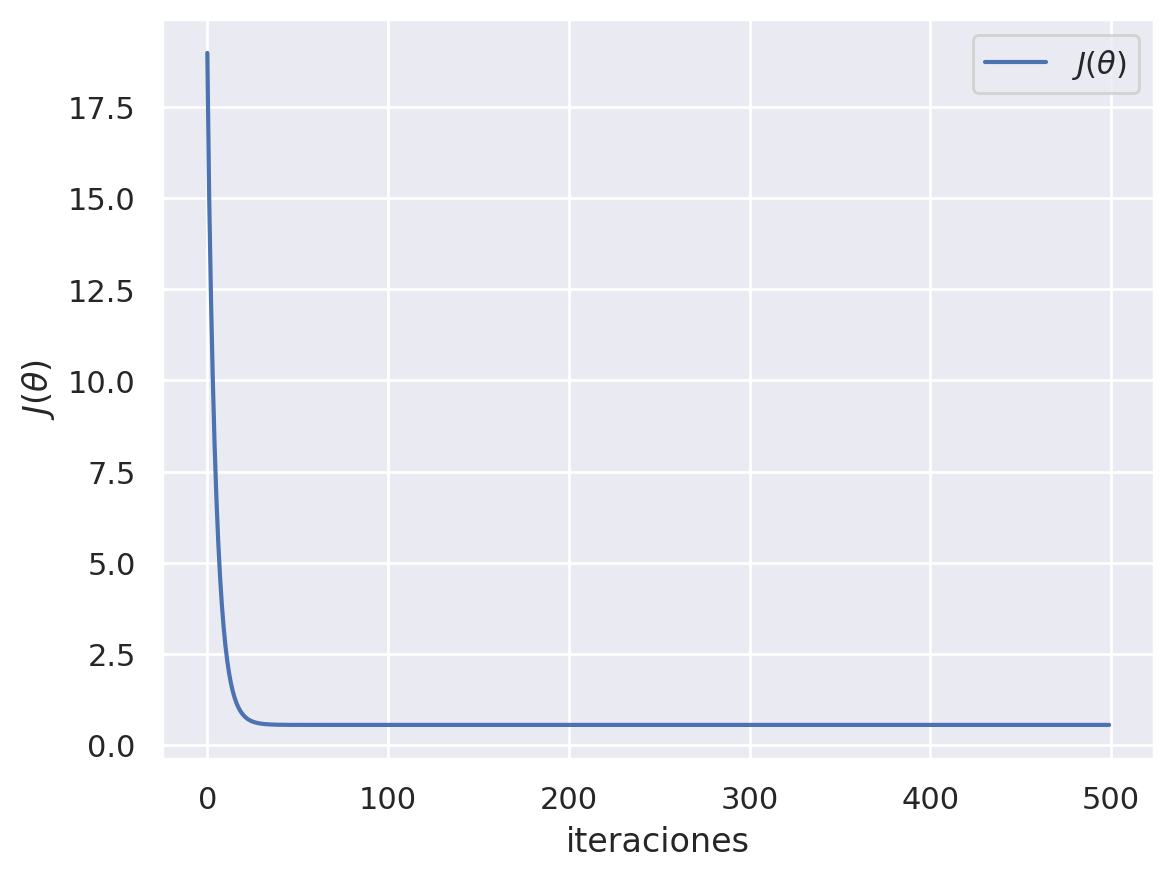

In [29]:
plt.plot(f_cost, label=r'$J(\theta)$')
plt.xlabel('iteraciones')
plt.ylabel(r'$J(\theta)$')
plt.legend();

En esta figura vemos que la función de coste decrece w.r.t iteraciones y que converge al valor mínimo. Una forma diferente, por ejemplo, si el valor de la función crece, indicaría que debemos probar con una velocidad de aprendizaje, $\alpha$, menor.

<br>

### Ejercicio:

Pruebe representar la evolución del ejemplo de Gradient Descent anterior

- Reduciendo el valor de $\alpha > 0.1$
- Aumentando el valor de $\alpha < 0.1$

* ¿qué consecuencias saca al variar la velocidad de aprendizaje?

* ¿Qué valor de $\alpha$ comienza a haber *overshooting*?

## Método Analítico: *Ecuación Normal*

Además de gradient descent existe una **forma directa** de calcular los parámetros $\boldsymbol{\theta}$ que minimizan la función de coste $J(\boldsymbol{\theta})$.

El resultado se llama **ecuación normal** y es la siguiente expresión:

$$
\hat{\boldsymbol{\theta}} = \left( {\bf X}^{\sf T} {\bf X} \right)^{-1} {\bf X}^{\sf T} {\bf y}
$$


Donde:

- $\hat{\boldsymbol{\theta}}$ es el valor de $\boldsymbol{\theta}$ que minimiza la función de coste.
- ${\bf y}$ es el vector *target*, y contiene $y^{(1)}\ldots y^{(m)}$
- ${\bf X}$ representa el training set y tiene dimensión $m\; \textsf{x}\; (n+1) $. Es decir, añado una columna al principio de la matriz ${\bf X}$ con todo 1's



La principal ventaja de esta forma de calcular los parámetros es que

- No hay que iterar.
- No hay que determinar un valor correcto de $\alpha$.

Como desventaja

- No escala bien con $n$ (features) y puede resultar lento.
- Hay que calcular $\left( {\bf X}^{\sf T} {\bf X} \right)^{-1}$

<br>

**Nota**: No lo vamos a demostrar, pero la Ecuación Normal se obtiene de resolver $\frac{\text{d} J(\boldsymbol{\theta})}{\text{d} \boldsymbol{\theta}}=0$ .

### Aplicación


Calculemos los parámetros $\boldsymbol{\theta}$ de nuestro ejemplo usando la Ecuación Normal:

In [30]:
# La ecuación es una línea de código
# pero podemos usar una función con parámetros de entrada
# nuestro training set y el vector de target 'y'

def normal_equation(trainset, target):
  """
  training set: matriz de (m x (n+1))
  target:  vector (m x 1)
  """
  return np.linalg.inv(trainset.T.dot(trainset)).dot(trainset.T).dot(target)


In [31]:
theta_best = normal_equation(X_b, y)
print('\u03B8 = ', theta_best)

θ =  [[-4.85944073]
 [ 1.85883775]]


El resultado es el mismo que el obtenido con Gradient Descent.

## Predicción de valores nuevos

Para obtener una predicción con valores nuevos de las features debemos resolver la hipótesis para ese ejemplo, es decir, calcular:

$$
h_{\boldsymbol{\theta}}({\bf X}) = {\bf X}{\boldsymbol{\theta}}
$$


In [32]:
# pasamos dos muestras, m = 2
X_new = np.array([[1.3],[5]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print('y_predict = ', y_predict)

y_predict =  [[-2.44295165]
 [ 4.43474803]]


Podemos dibujar los datos originales con la hipótesis para comprobar la predicción de forma visual:

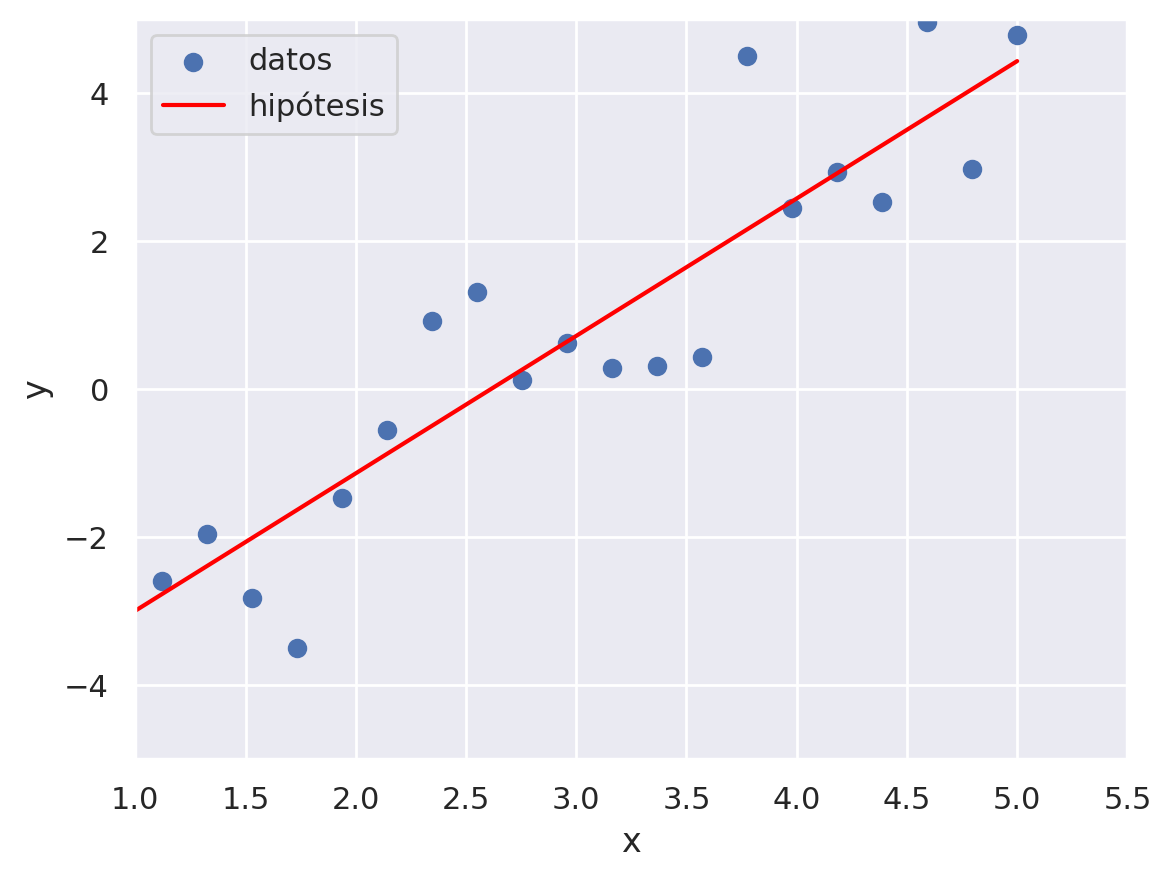

In [33]:
tt1 = theta_best[1]
tt0 = theta_best[0]
y_est = tt1 * x + tt0

# plot del traning set
plt.scatter(x, y, label='datos')
#plot de la hipótesis
plt.plot(x, y_est, color='red', label='hipótesis')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((1,5.5))
plt.ylim((-5,5))
#plt.grid()
plt.legend();

<a name='sec_sklearn'></a>
# Librería `Scikit-learn` o `sklearn`

[`Sklearn`](https://scikit-learn.org/stable/) es la librería de Machine Learning de Python. Está construida sobre las conocidas `Scipy` y `Numpy`.
Contiene los principales métodos de aprendizaje **supervisado** y **no supervisado**.

La idea de funcionamiento de los algoritmos que implementa esta librería consiste en

* Crear una instancia del *objeto*, o **estimador**, del algoritmo, parametrizándola según convenga, y,
* Ajustar, *fit*, para nuestros datos.


La idea es separar el modelo de los datos.
Seguidamente usamos `sklearn` para crear un estimador de un regresor lineal que y resolveremos el problema de los datos que estamos usando a lo largo de este notebook.

In [34]:
# recuperamos los datos del training set
# los datos generados al principio del notebook
npr.seed(0)
m = 50 # número de muestras en el training set
x = np.linspace(-5, 5, m)
tt1_real = 2
tt0_real = -5

def noise(t):
  return npr.normal(0, 1, size=t)

y = tt1_real * x + tt0_real + noise(m)
X = x[:, np.newaxis] # np.newaxis sirve para ponerlo como vec vertical
y = y[:, np.newaxis]

# print(X)
# print(y)

In [35]:
# creamos un estimador
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [36]:
# Entrenamos con nuestros datos
lin_reg.fit(X, y)

LinearRegression()

Los parámetros estimados son atributos del objeto *estimador*, y sus nombres terminan en `_`. Por ejemplo,

In [37]:
lin_reg.intercept_ , lin_reg.coef_

(array([-4.85944073]), array([[1.85883775]]))

Comprobamos que estos parámetros coinciden con los resultados anteriores.

Hacer una predicción es fácil:

In [38]:
lin_reg.predict

<bound method LinearModel.predict of LinearRegression()>

In [39]:
lin_reg.predict([[1.3],[5]])

array([[-2.44295165],
       [ 4.43474803]])

Coincide con los resultados de la sección de predicción de valores.

<br>

---

In [ ]:
# NOTA: En Colaboratory
# Métodos (cubos) y Atributos (llaves) : mirar al final
lin_reg.

## Polynomial Regression

Hasta ahora hemos resuelto problemas donde nuestros datos se comportan de forma lineal. ¿Qué sucede si nuestros datos se comportan de una form no lineal?.

En este caso más complejo también podemos aplicar un estimador lineal usando el siguiente *truco*:

* Podemos extender el training set, ${\bf X}$, con nuevas *features* que sean potencias o combinaciones de las features existentes.

A esta técnica se le denomina **Polynomial Regression**.

Es posible extender el training set usando `sklearn` como vemos a continuación.

### Ejemplo:

A modo de ejemplo, podemos geneerar un training set con datos no lineales basados en un polinomio de segundo grado (ecuación cuadrática), al que añadiremos algo de ruido.

In [43]:
npr.seed(0)
m = 100
X = 6 * npr.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + npr.randn(m ,1)

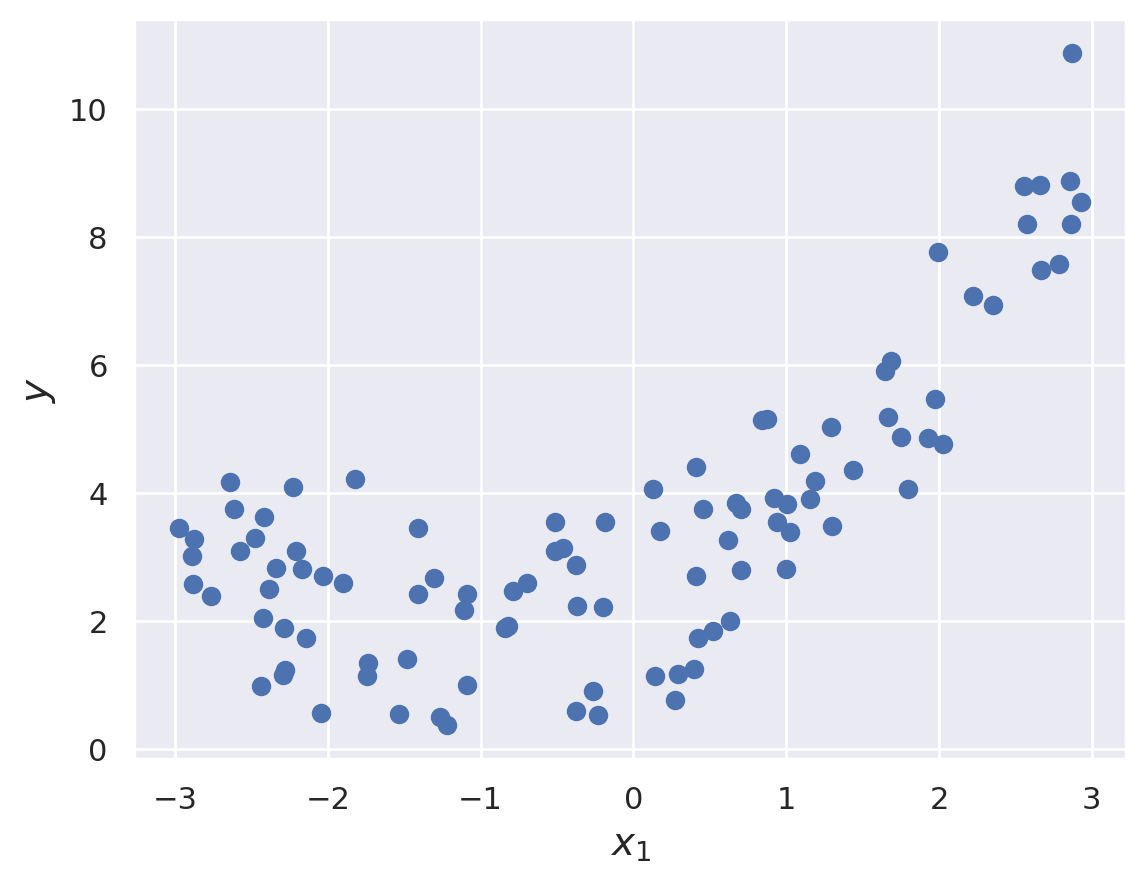

In [44]:
plt.scatter(X, y)
plt.xlabel('$x_{1}$', fontsize=14)
plt.ylabel('$y$', fontsize=14);

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [46]:
X.shape

(100, 1)

In [47]:
X_poly.shape
# En X_poly tenemos 2 columnas [X,X^2] -> degree=2

(100, 2)

In [48]:
X_poly[0]

array([0.29288102, 0.08577929])

In [49]:
0.29288**2

0.08577869439999998

Ahora podemos ajustar un modelo `LinearRegression` a este training set ampliado.

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [51]:
lin_reg.intercept_ , lin_reg.coef_

(array([2.34050076]), array([[0.97906552, 0.44978823]]))

(np.float64(-3.0), np.float64(3.0), np.float64(0.0), np.float64(10.0))

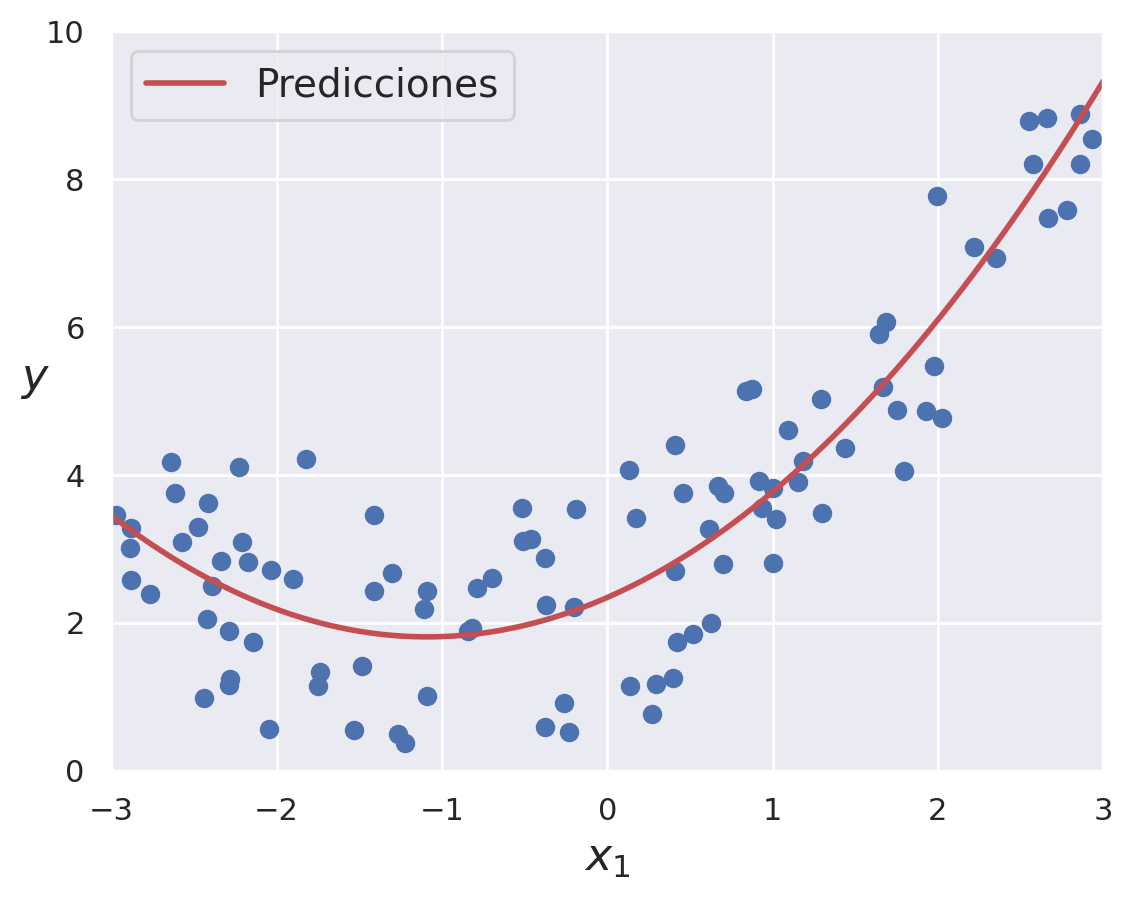

In [52]:
# generamos nuevos datos usando el objeto poly_features
# que hemos generado con nuestros datos
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
# Para generar los datos de test usamos .tranform;
#.fit_transform es sólo para el training set
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.scatter(X, y)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=14);
plt.axis([-3, 3, 0, 10])
#plt.show()

### Truco: `sklearn pipeline`

Hacer el proceso de
1. Transformar datos extendiendo *features*
2. Ajustar Linear Regression

A veces puede resultar un poco largo. Podemos juntar varios procesos incluyendolos en un `pipeline`. Además, es posible añadir un `imputer=` que rellene los datos que sean NaN o estén vacíos con, por ejemplo, el valor medio de ese feature.

Vamoa a ver cómo aplicaríamos `pipeline` a este ejemplo.

In [53]:
from sklearn.pipeline import make_pipeline

In [54]:
poly_model = make_pipeline(
                      PolynomialFeatures(degree=2),
                      LinearRegression()
                      )

In [55]:
poly_model.fit(X, y)
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new = poly_model.predict(X_new)

(np.float64(-3.0), np.float64(3.0), np.float64(0.0), np.float64(10.0))

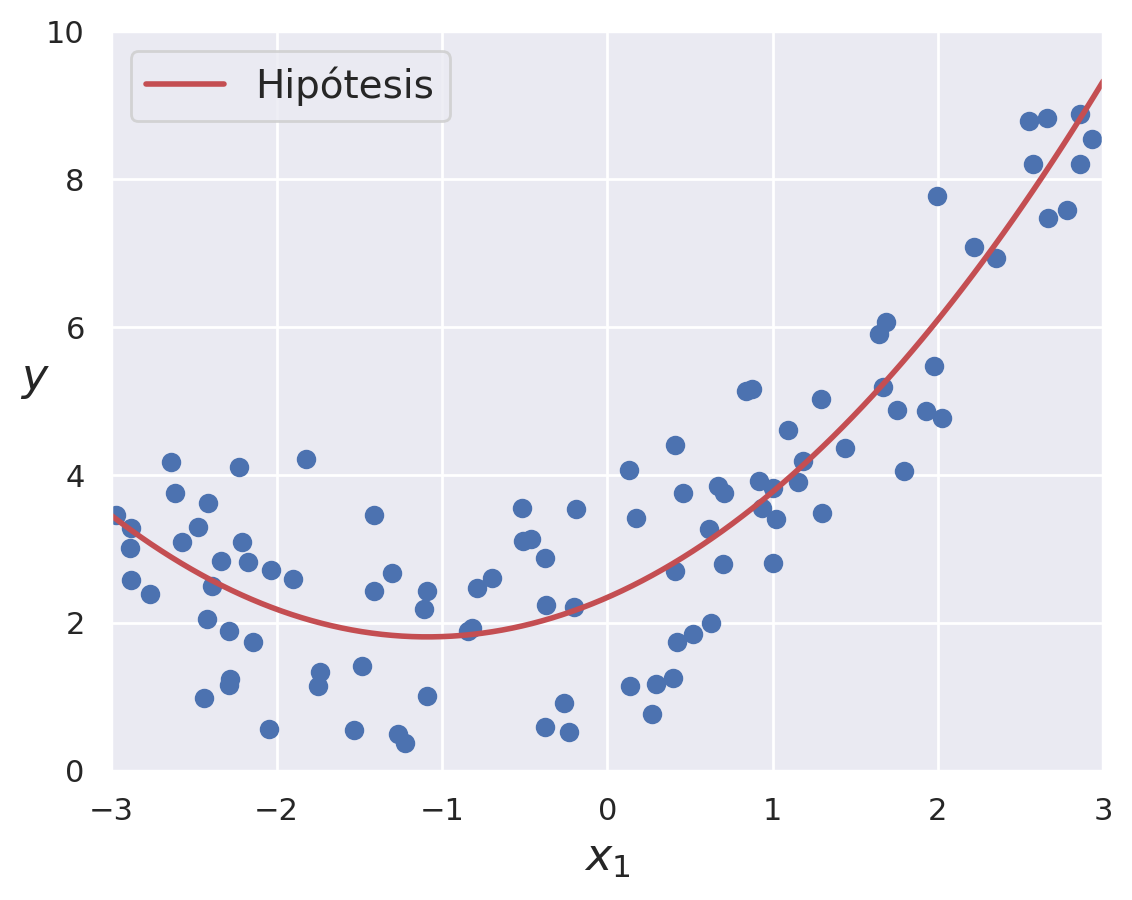

In [56]:
plt.scatter(X, y)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Hipótesis")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=14);
plt.axis([-3, 3, 0, 10])

De este modo acortamos un poco el proceso. De cualquier forma puede que resulte más instructivo hacer la transformación y el ajuste por separado.

## Overfitting y Underfitting

Uno de los problemas que podemos encontrar es seleccionar el grado del polinómio que queremos usar como hipótesis para nuestros datos.

Si seleccionamos un grado que resulte *bajo* algunos datos nuevos (usamos para validar el modelo) ajustarán bien con el training set original y otros sin embargo, quedarán lejos y tendrán bastante error. En este caso decimos que hay **underfitting**.

Por otro lado, si el grado del polynomio de nuestra hipótesis es alto, ajustará muy bien los datos del training set pero no así los datos nuevos que usemos para validar. El polinómio hipótesis oscilará mucho entre los puntos y se alejará de los datos del training set, y, se producirán errores altos. En este caso decimos que hay **overfitting**.

Para ilustrar estos problemas ajustaremos los datos con un 3 tipos de polinómio de grado diferente (por ejemplo, 1, 2 y 100).

Además, vamos a **normalizar** son la clase `StandardScaler` con el objetivo de que el algoritmo de optimización converja antes.

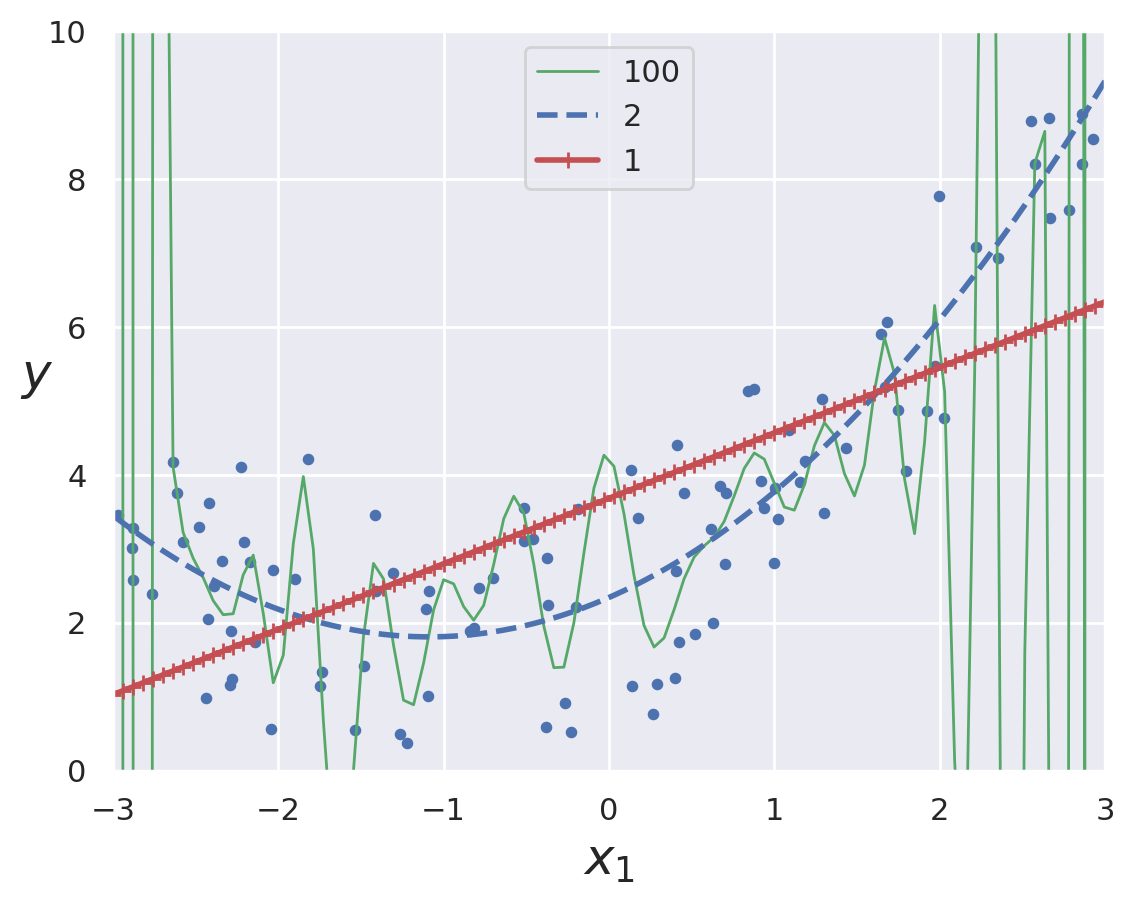

In [57]:
# "StandardScaler" es necesario para grado alto (=100).
# Equivale a "normalizar":
# vamos a tener features con valores mucho más grandes que otros
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 100), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.scatter(X, y, s=10)
plt.legend(loc="upper center")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

### Regularización

Tanto en problemas supervisados de regresión como en problemas de clasifficación, si la cantidad de features es elevada se producirá **overfitting**. La forma de solucionar este problema es realizando **Regularización**.

La idea tras la regularización no es reducir las features del training set, ya que, pueden ser relativamente importantes incluirlas en el modelo. Lo que se hace es **modular** su importancia haciendo que los parámetros $\theta_j$ correspondiente a la feature $j$ sea muy bajo.

<br>

---

<br>

# Glosario de funciones Python usadas:

- <span style='color:Red'>`A.dot(B)`</span>: multiplicación de matrices A x B. A partir de Python 3.5 podemos usar el operador `A` @ `B`,
- <span style='color:Red'>`np.linalg.inv(A)`</span>: $A^{-1}$
- <span style='color:Red'>`np.c_[A, B]`</span>: concatenación en columnas de A y B
- `A.T`: Traspuesta de matriz A con numpy
- `np.linalg.inv(A)`: Inversión de matriz A con numpy
- `%timeit ...`: Medida de tiempo de una orden con ipython
- Medida de tiempo de un bloque de código:
   
   start_time = timeit.default_timer()
   
    $\hspace{1cm}\vdots$

    elapsed = timeit.default_timer() - start_time

Python muestra documentación mediante '?' y '??' tras la función que queramos usar.

Además en Jupyter podemos pulsar las teclas "`Shift` + `Tab`" detro de la función para mostrar ayuda *online*. Por ejemplo, `plt.scatter(`"`Shift` + `Tab``" .

In [ ]:
plt.scatter(x, y)

---

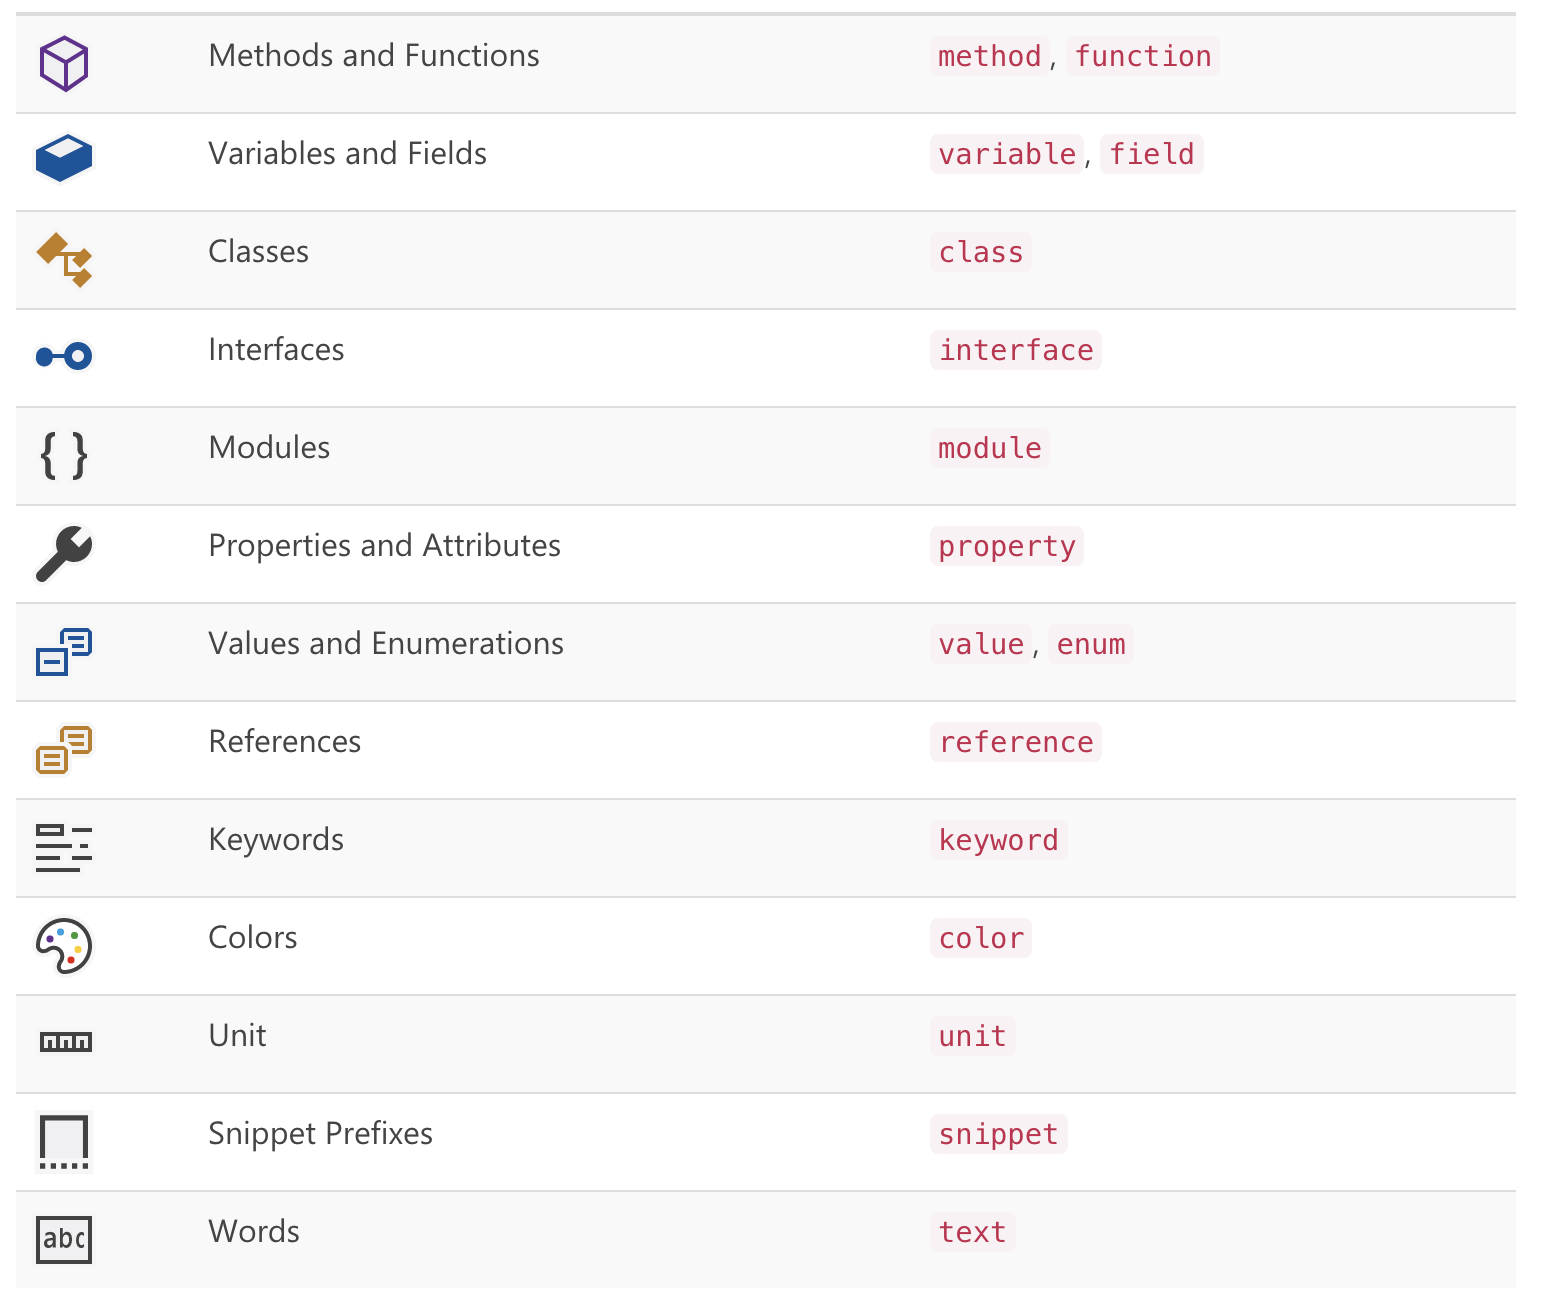